In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("chicago_crime_final.csv", encoding='utf-8', low_memory=False)

In [126]:
df.isna().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description    13853
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Community Area              0
FBI Code                    0
X Coordinate                0
Y Coordinate                0
Year                        0
Updated On                  0
Latitude                    0
Longitude                   0
Location                    0
geometry                    0
Community Area Name         0
F_Date                      0
Time                        0
INDEX CODE_x             6439
IsDangerous                 0
INDEX CODE_y             6439
IsViolentIndex              0
dtype: int64

In [164]:
sample_df = df.sample(n=100000, random_state=42)
# 샘플 데이터 저장
sample_df.to_csv("sample_data.csv", index=False)

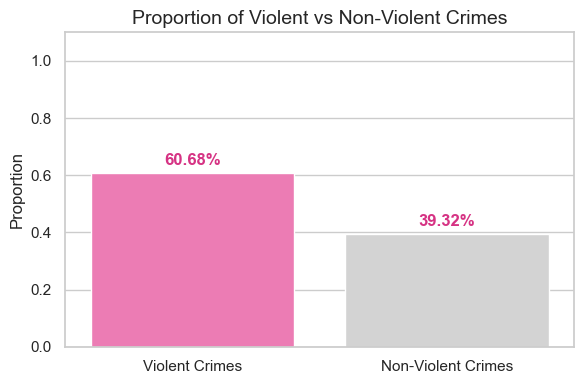

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1. 정의한 강력범죄 유형
violent_types = [
    'HOMICIDE', 'CRIMINAL SEXUAL ASSAULT', 'ROBBERY',
    'BATTERY', 'RITUALISM', 'ASSAULT',
    'BURGLARY', 'THEFT', 'MOTOR VEHICLE THEFT',
    'ARSON', 'HUMAN TRAFFICKING'
]

# 2. IsViolent 컬럼 생성
df['IsViolent'] = df['Primary Type'].isin(violent_types).astype(int)

# 3. 비율 계산
violent_ratio = df['IsViolent'].mean()

# 4. 핑크 테마 시각화
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.barplot(
    x=['Violent Crimes', 'Non-Violent Crimes'],
    y=[violent_ratio, 1 - violent_ratio],
    palette=['#FF69B4', '#D3D3D3']  # 진핑크 + 연회색
)

# 비율 텍스트 추가
for i, v in enumerate([violent_ratio, 1 - violent_ratio]):
    plt.text(i, v + 0.02, f"{v * 100:.2f}%", ha='center', va='bottom', fontsize=12, fontweight='bold', color='#D63384')

# 그래프 마무리
plt.title('Proportion of Violent vs Non-Violent Crimes', fontsize=14)
plt.ylabel('Proportion')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()


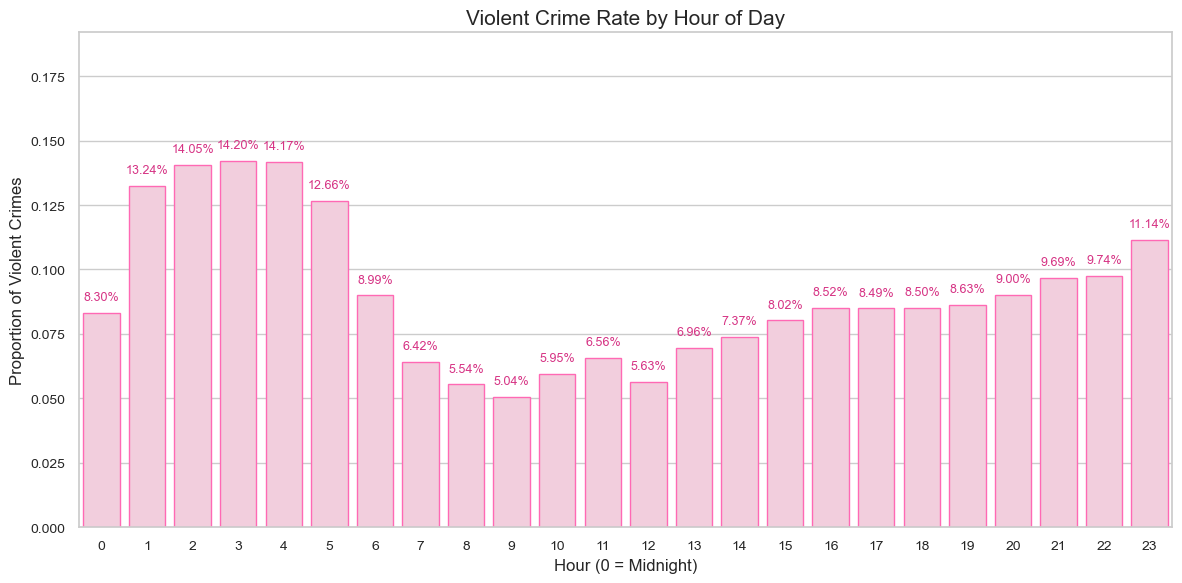

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Time 컬럼 → datetime.time 처리
df['Time'] = pd.to_datetime(df['Time'], format="%H:%M:%S", errors='coerce').dt.time
df['Hour'] = pd.to_datetime(df['Time'], format="%H:%M:%S", errors='coerce').dt.hour

# 2. 시간대별 폭력 범죄 비율
violent_by_hour = df.groupby('Hour')['IsViolent'].mean().sort_index()

# 3. 시각화 (핑크 테마)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# 커스텀 핑크 계열 팔레트 만들기 (24개 시간대용)
pink_palette = sns.color_palette(["#F8C8DC"] * 24)

sns.barplot(x=violent_by_hour.index,
            y=violent_by_hour.values,
            palette=pink_palette,
            edgecolor='#FF69B4')  # 핑크 테두리

# 타이틀 및 라벨
plt.title('Violent Crime Rate by Hour of Day', fontsize=15)
plt.xlabel('Hour (0 = Midnight)', fontsize=12)
plt.ylabel('Proportion of Violent Crimes', fontsize=12)

# 막대 위에 비율 텍스트
for i, v in enumerate(violent_by_hour.values):
    plt.text(i, v + 0.005, f"{v * 100:.2f}%", ha='center', fontsize=9, color='#D63384')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, violent_by_hour.max() + 0.05)
plt.tight_layout()
plt.show()


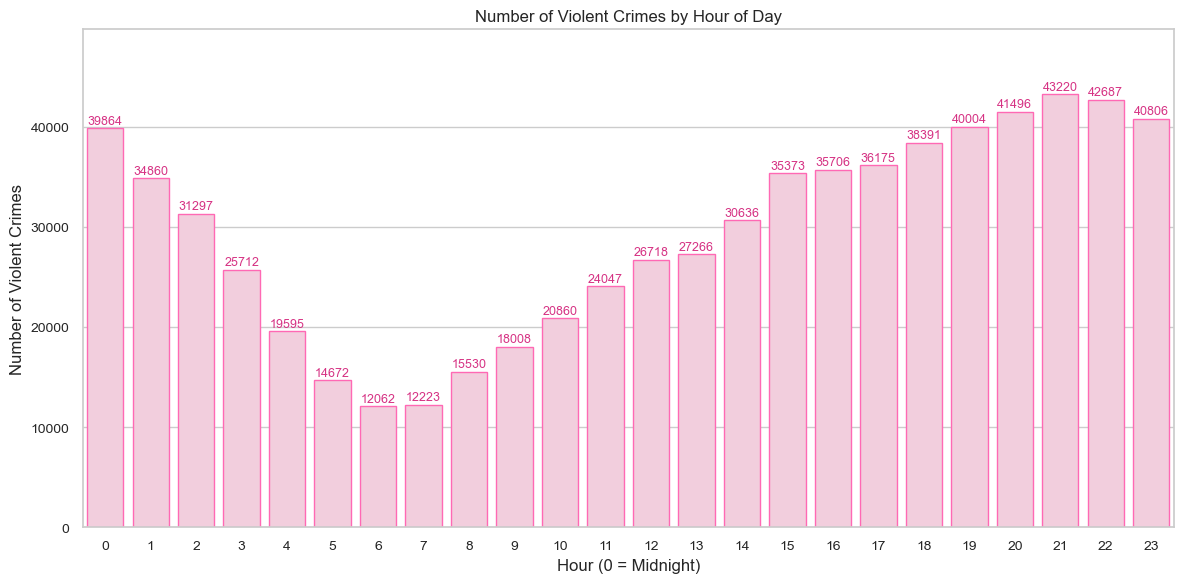

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Time 컬럼 정제
df['Time'] = pd.to_datetime(df['Time'], format="%H:%M:%S", errors='coerce').dt.time
df['Hour'] = pd.to_datetime(df['Time'], format="%H:%M:%S", errors='coerce').dt.hour

# 2. Time이 있는 행만 사용
df_time = df[df['Hour'].notna()]

# 3. 시간대별 폭력 범죄 건수 계산
violent_by_hour = df_time[df_time['IsViolent'] == 1].groupby('Hour').size().sort_index()

# 4. 시각화 (핑크 테마)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

pink_palette = sns.color_palette(["#F8C8DC"] * 24)

sns.barplot(x=violent_by_hour.index,
            y=violent_by_hour.values,
            palette=pink_palette,
            edgecolor='#FF69B4')

# 타이틀 및 라벨
plt.title('Number of Violent Crimes by Hour of Day')
plt.xlabel('Hour (0 = Midnight)', fontsize=12)
plt.ylabel('Number of Violent Crimes', fontsize=12)

# 막대 위에 건수 표시
for i, v in enumerate(violent_by_hour.values):
    plt.text(i, v + max(violent_by_hour.values) * 0.01, f"{int(v)}", ha='center', fontsize=9, color='#D63384')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, violent_by_hour.max() * 1.15)
plt.tight_layout()
plt.show()


                                     count     sum  Dangerous Proportion
Primary Type                                                            
THEFT                              1754086       0              0.000000
BATTERY                            1508471  222980             14.781855
CRIMINAL DAMAGE                     941565       0              0.000000
NARCOTICS                           759310       0              0.000000
ASSAULT                             550943  149928             27.212978
OTHER OFFENSE                       515365       0              0.000000
BURGLARY                            439508       0              0.000000
MOTOR VEHICLE THEFT                 420504       0              0.000000
DECEPTIVE PRACTICE                  378057       0              0.000000
ROBBERY                             310911  310911            100.000000
CRIMINAL TRESPASS                   223499       0              0.000000
WEAPONS VIOLATION                   121488       0 

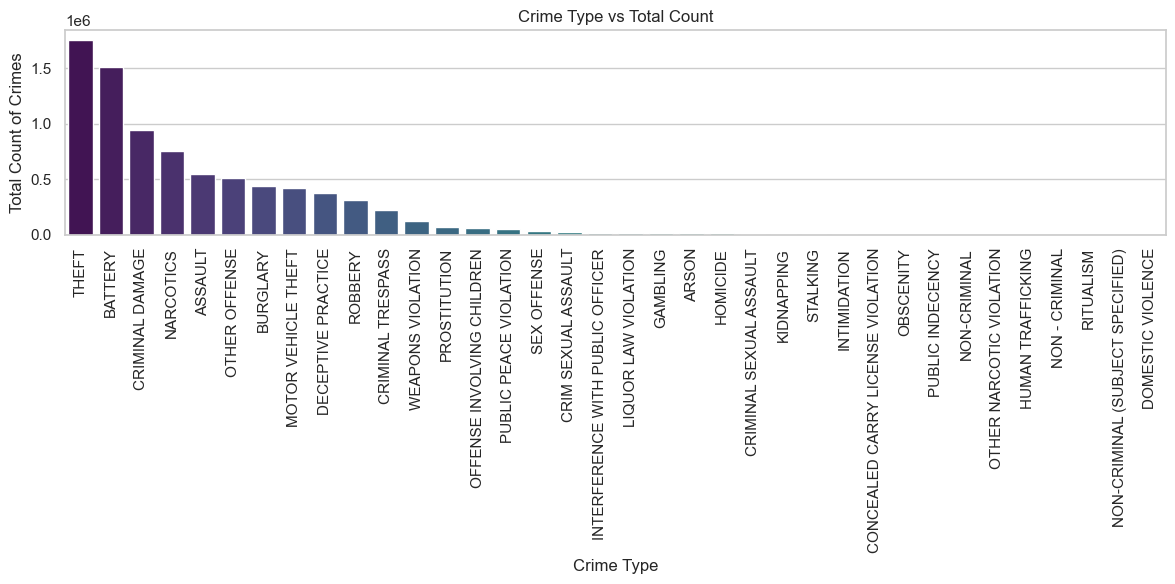

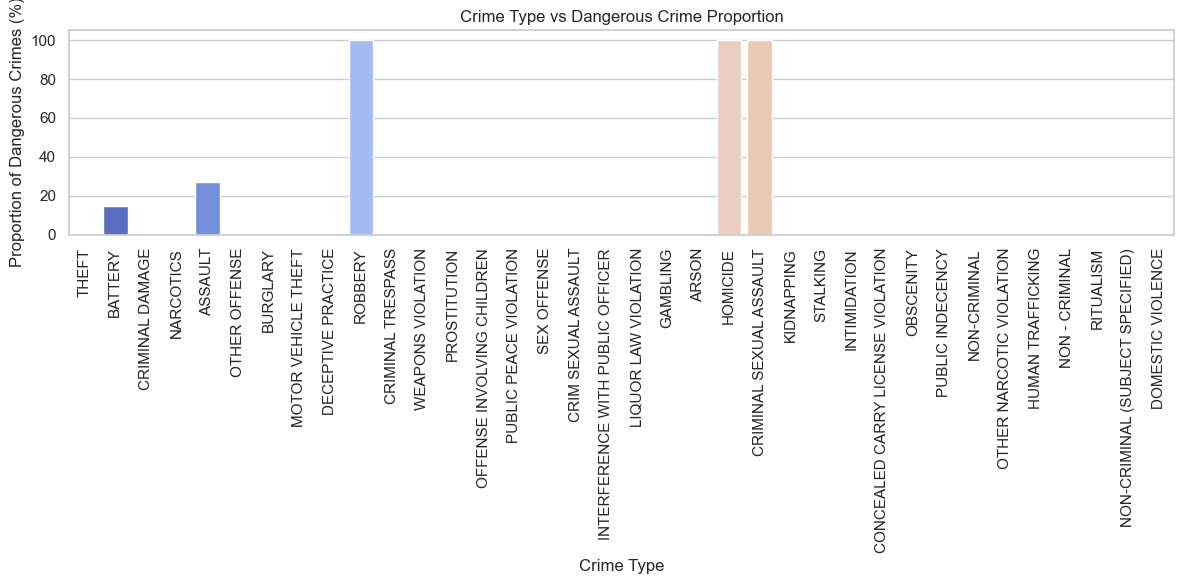

In [162]:
# Primary Type에 따른 IsDangerous 분포와 비율 계산
crime_counts = df.groupby('Primary Type')['IsViolent'].agg(['count', 'sum'])

# 위험한 사건 비율 계산
crime_counts['Dangerous Proportion'] = crime_counts['sum'] / crime_counts['count'] * 100

# 결과 확인
crime_counts = crime_counts.sort_values(by='count', ascending=False)  # 사건 수 기준으로 정렬
print(crime_counts)

# 시각화: 범죄 유형별 사건 수
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_counts.index, y=crime_counts['count'], palette='viridis')
plt.title('Crime Type vs Total Count')
plt.xlabel('Crime Type')
plt.ylabel('Total Count of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 시각화: 범죄 유형별 위험한 사건 비율
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_counts.index, y=crime_counts['Dangerous Proportion'], palette='coolwarm')
plt.title('Crime Type vs Dangerous Crime Proportion')
plt.xlabel('Crime Type')
plt.ylabel('Proportion of Dangerous Crimes (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


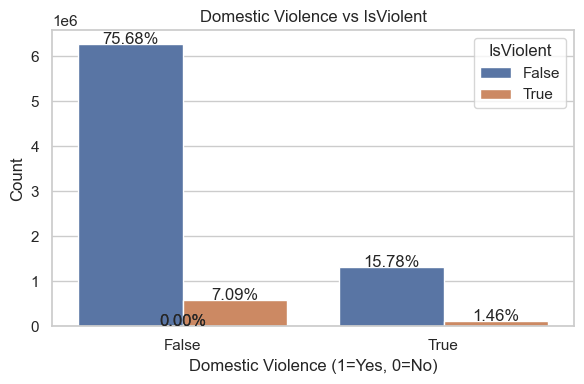

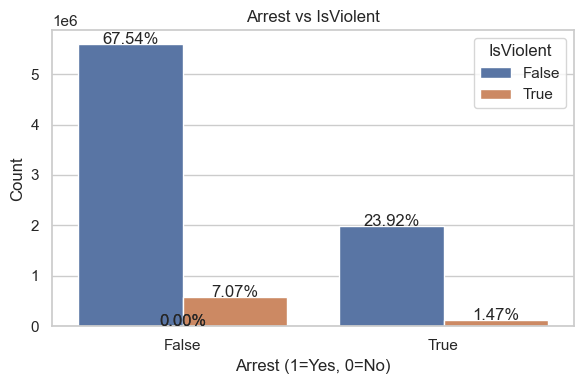

In [28]:

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Domestic', hue='IsViolent')
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x_position = p.get_x() + width / 2
    y_position = height + 0.02
    percentage = height / df.shape[0] * 100
    ax.text(x_position, y_position, f"{percentage:.2f}%", ha='center', fontsize=12)
plt.title('Domestic Violence vs IsViolent')
plt.xlabel('Domestic Violence (1=Yes, 0=No)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Arrest', hue='IsViolent')
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x_position = p.get_x() + width / 2
    y_position = height + 0.02
    percentage = height / df.shape[0] * 100
    ax.text(x_position, y_position, f"{percentage:.2f}%", ha='center', fontsize=12)
plt.title('Arrest vs IsViolent')
plt.xlabel('Arrest (1=Yes, 0=No)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


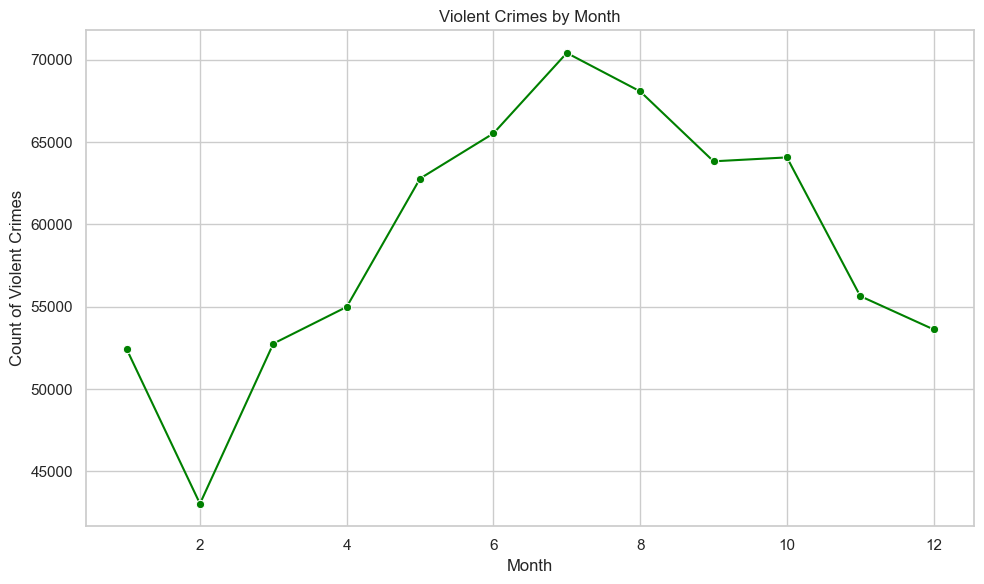

In [163]:
# 월별 위험한 사건 발생 추이
df['Month'] = pd.to_datetime(df['Date']).dt.month
violent_by_month = df[df['IsViolent'] == 1].groupby('Month').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=violent_by_month.index, y=violent_by_month.values, marker='o', color='green')
plt.title('Violent Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Count of Violent Crimes')
plt.tight_layout()
plt.show()


In [ ]:
!pip install folium

In [ ]:
import folium

# 시카고의 기본 좌표 (위도, 경도)
m = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

# 위험한 사건 마커 추가
for idx, row in df[df['IsViolent'] == 1].iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(m)

# 지도 보기
m

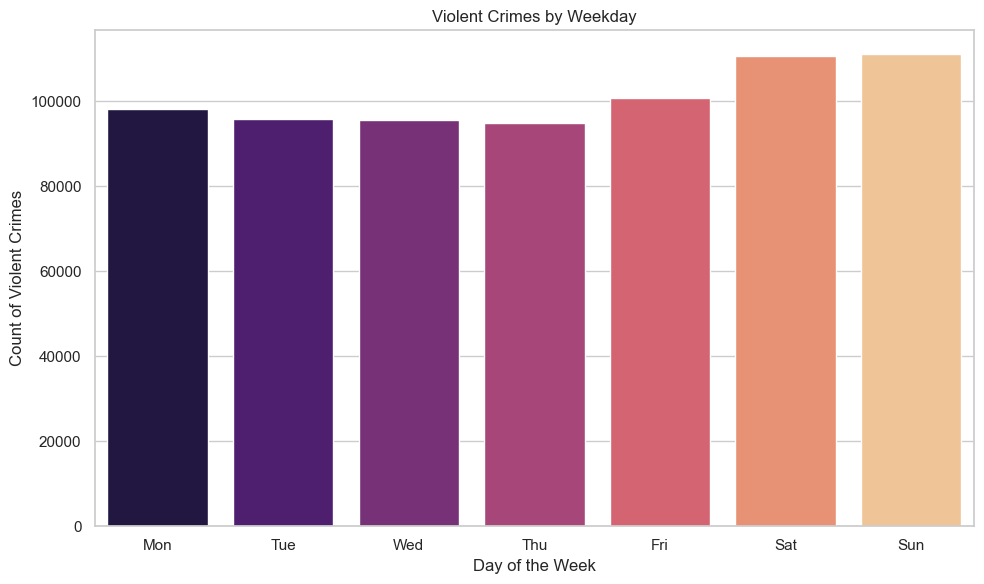

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 날짜 데이터를 datetime 형식으로 변환하고 요일 추출
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Weekday'] = df['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# 요일 이름 맵핑
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['Weekday Name'] = df['Weekday'].map(weekday_map)

# 요일별 강력범죄 개수 계산
violent_by_weekday = df[df['IsViolent'] == 1].groupby('Weekday Name').size()

# 요일 순서 정렬
violent_by_weekday = violent_by_weekday.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=violent_by_weekday.index, y=violent_by_weekday.values, palette='magma')
plt.title('Violent Crimes by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Violent Crimes')
plt.tight_layout()
plt.show()


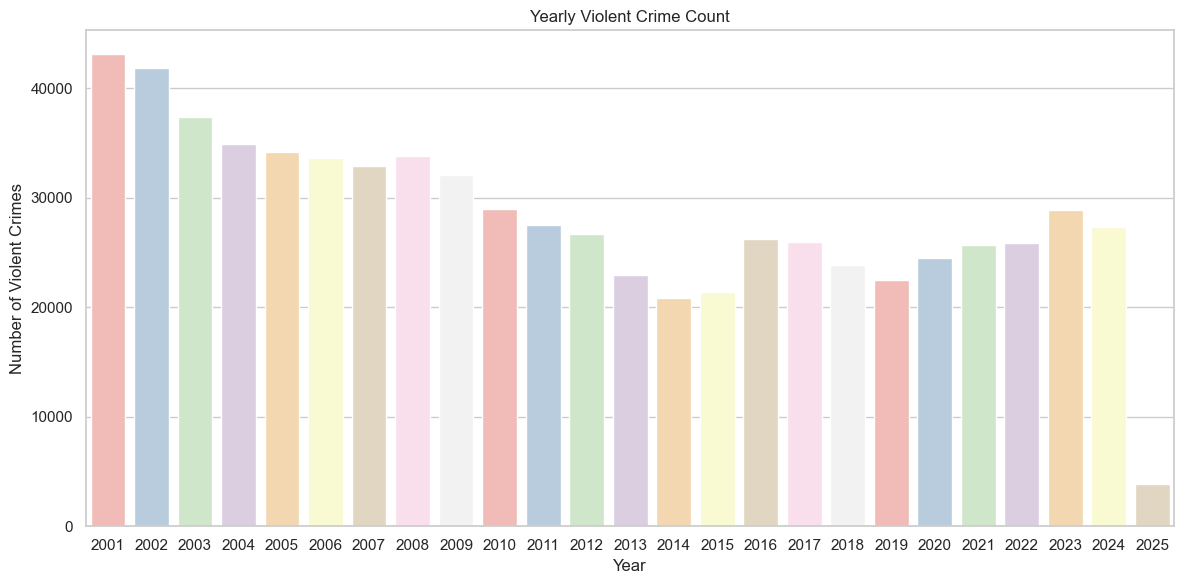

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연도별 강력범죄 건수 계산
yearly_violent_count = df[df['IsViolent'] == 1].groupby('Year').size()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_violent_count.index, y=yearly_violent_count.values, palette='Pastel1')
plt.title('Yearly Violent Crime Count')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crimes')
plt.tight_layout()
plt.show()


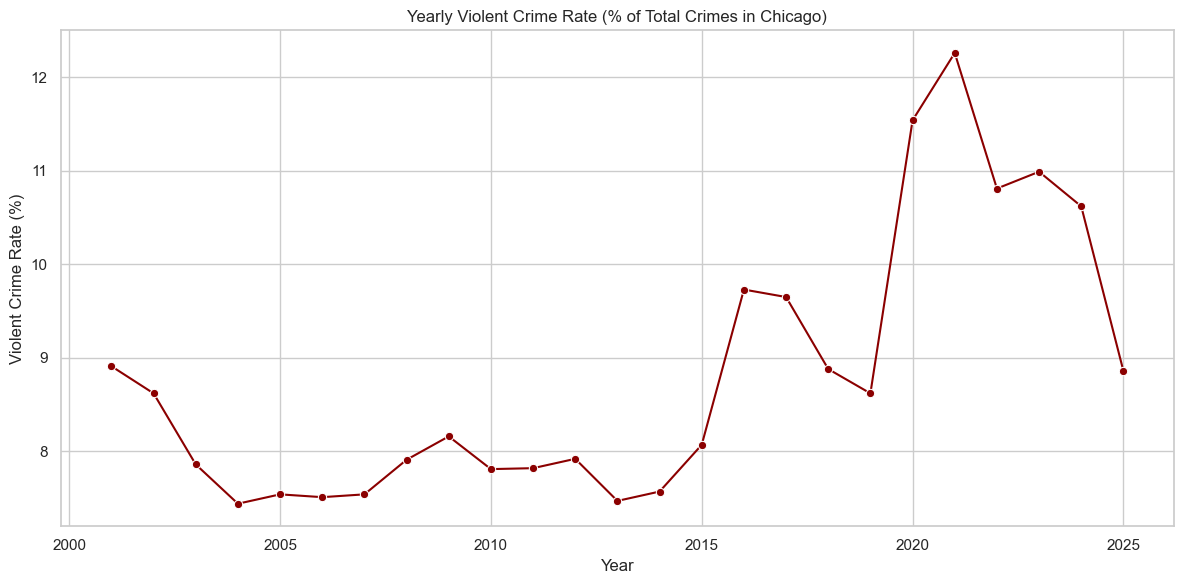

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 날짜에서 연도 추출
df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year

# 연도별 전체 범죄 수
yearly_total = df.groupby('Year').size()

# 연도별 강력범죄 수
yearly_violent = df[df['IsViolent'] == 1].groupby('Year').size()

# 강력범죄 비율 계산
yearly_ratio = (yearly_violent / yearly_total * 100).round(2)

# 데이터프레임으로 정리
yearly_stats = pd.DataFrame({
    'Total Crimes': yearly_total,
    'Violent Crimes': yearly_violent,
    'Violent Crime Rate (%)': yearly_ratio
}).fillna(0).astype({'Total Crimes': int, 'Violent Crimes': int})

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_stats, x=yearly_stats.index, y='Violent Crime Rate (%)', marker='o', color='darkred')
plt.title('Yearly Violent Crime Rate (% of Total Crimes in Chicago)')
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate (%)')
plt.tight_layout()
plt.show()


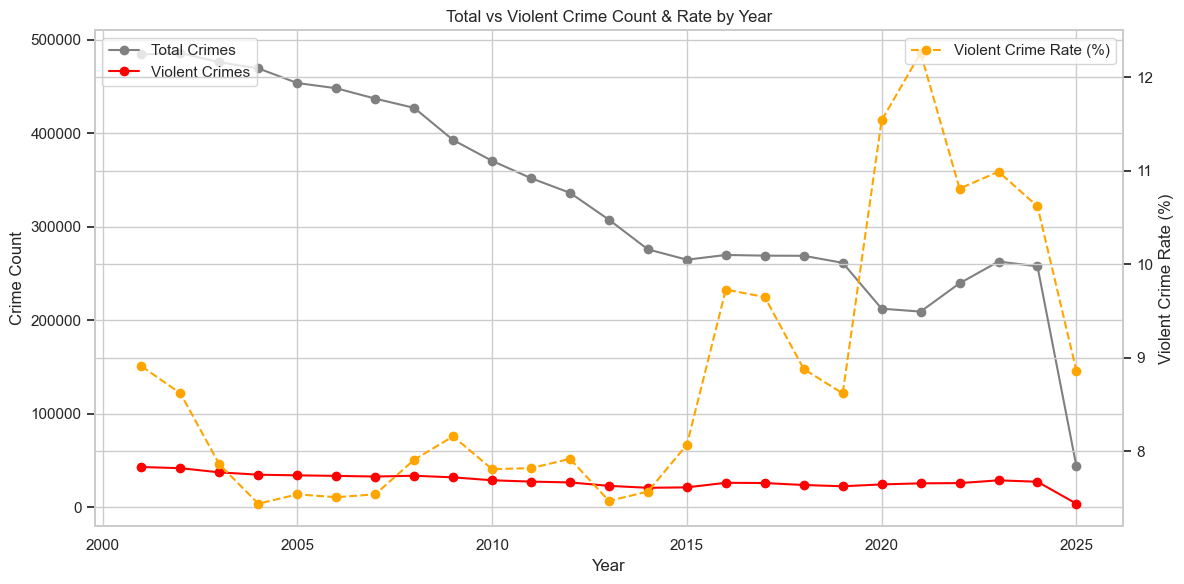

In [48]:
import matplotlib.pyplot as plt

# 연도별 전체 및 강력범죄 수
yearly_total = df.groupby('Year').size()
yearly_violent = df[df['IsViolent'] == 1].groupby('Year').size()
yearly_ratio = (yearly_violent / yearly_total * 100).round(2)

# 이중 y축 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 y축: 전체 및 강력범죄 수
ax1.plot(yearly_total.index, yearly_total.values, label='Total Crimes', color='gray', marker='o')
ax1.plot(yearly_violent.index, yearly_violent.values, label='Violent Crimes', color='red', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Crime Count')
ax1.legend(loc='upper left')
ax1.tick_params(axis='y')

# 두 번째 y축: 비율
ax2 = ax1.twinx()
ax2.plot(yearly_ratio.index, yearly_ratio.values, label='Violent Crime Rate (%)', color='orange', marker='o', linestyle='--')
ax2.set_ylabel('Violent Crime Rate (%)')
ax2.legend(loc='upper right')
ax2.tick_params(axis='y')

plt.title('Total vs Violent Crime Count & Rate by Year')
plt.tight_layout()
plt.show()


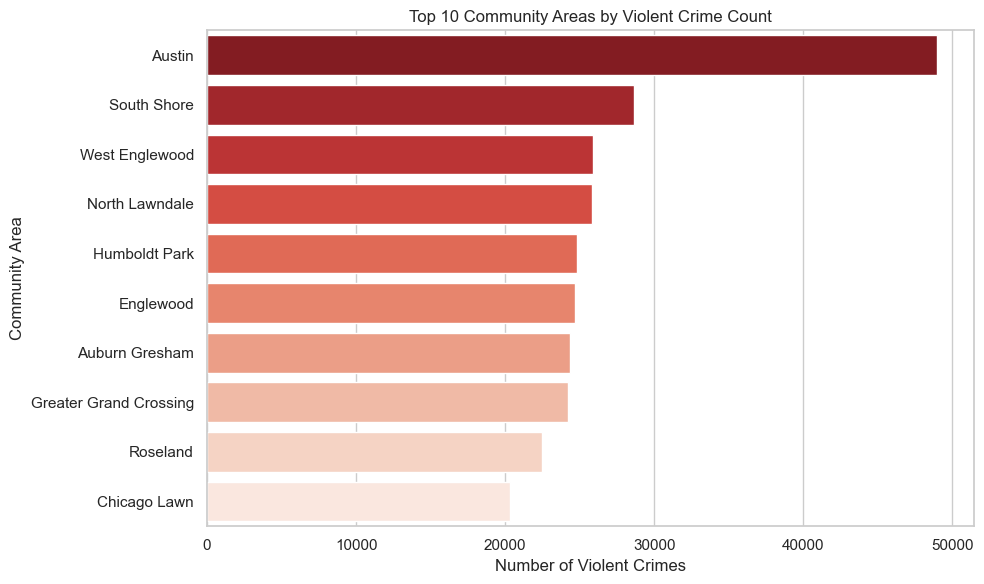

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 강력범죄 필터링
violent_df = df[df['IsViolent'] == 1]

# 2. 커뮤니티 지역별 강력범죄 수 계산 후 상위 10개 추출
top10_communities = violent_df['Community Area Name'].value_counts().head(10)

# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_communities.values, y=top10_communities.index, palette='Reds_r')
plt.title('Top 10 Community Areas by Violent Crime Count')
plt.xlabel('Number of Violent Crimes')
plt.ylabel('Community Area')
plt.tight_layout()
plt.show()


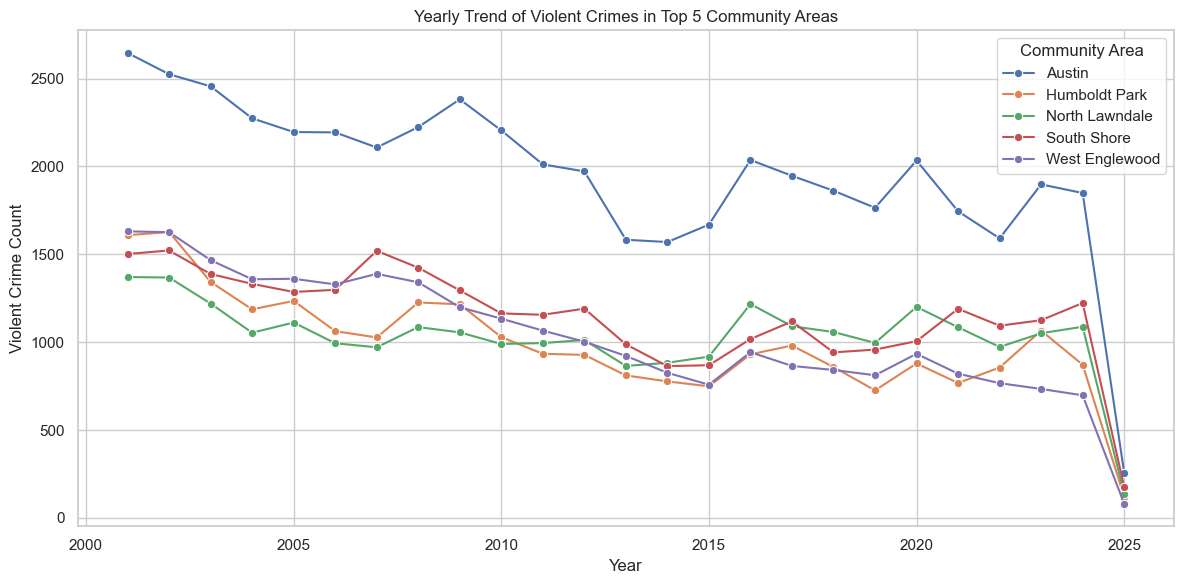

In [45]:
# 상위 5개 강력범죄 커뮤니티 지역 추출
top5_areas = df[df['IsViolent'] == 1]['Community Area Name'].value_counts().head(5).index.tolist()

# 해당 지역 데이터 필터링
filtered = df[(df['IsViolent'] == 1) & (df['Community Area Name'].isin(top5_areas))]

# 연도별 지역별 집계
trend_data = filtered.groupby(['Year', 'Community Area Name']).size().reset_index(name='Count')

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='Year', y='Count', hue='Community Area Name', marker='o')
plt.title('Yearly Trend of Violent Crimes in Top 5 Community Areas')
plt.xlabel('Year')
plt.ylabel('Violent Crime Count')
plt.legend(title='Community Area')
plt.tight_layout()
plt.show()


In [68]:
# PDF에서 확인된 'INDEX CODE'가 'I'인 IUCR 코드들을 리스트로 정의
index_crime_codes = [
    # 살인
    '110', '130',
    # 성폭행
    '261', '262', '263', '264', '265', '266', '271', '272', '273', '274', '275', '281', '291',
    # 강도
    '312', '313', '031A', '031B', '320', '325', '326', '330', '331', '334', '337', '033A', '033B', '340',
    # 가중 폭행
    '041A', '041B', '420', '430', '450', '451', '452', '453', '461', '462', '479',
    '480', '481', '482', '483', '485', '487', '488', '489', '490', '491', '492', '493',
    '495', '496', '497', '498', '499', '510',
    # 가중 협박
    '051A', '051B', '520', '530', '550', '551', '552', '553', '555', '556', '557', '558',
    # 주거침입절도
    '610', '620', '630', '650',
    # 절도
    '810', '820', '830', '840', '841', '842', '843', '850', '860', '865', '870', '880', '890', '895',
    # 차량 절도
    '910', '915', '917', '918', '920', '925', '927', '928', '930', '935', '937', '938',
    # 방화
    '1010', '1020', '1025', '1090',
    # 인신매매
    '1050', '1055',
    # 가족 내 아동 성폭행
    '1753', '1754'
]

# 강력범죄 여부 컬럼 추가: 1급 범죄면 1, 아니면 0
df['IsDangerous'] = df['IUCR'].astype(str).isin(index_crime_codes).astype(int)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8276672 entries, 0 to 8276671
Data columns (total 34 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int32         
 18  Updated On            object        
 19  

In [52]:
df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,F_Date,Time,IsDangerous,IsViolent,Hour,IsNight,IsWeekend,Month,Weekday,Weekday Name
0,6255892,HP342049,2008-05-17 18:00:00,101XX S LAFAYETTE AVE,031A,ROBBERY,ARMED - HANDGUN,RESIDENCE,False,False,...,2008-05-17,18:00:00,1,True,18,1,1,5,5,Sat
1,6272641,HP358387,2008-05-27 01:00:00,105XX S PERRY AVE,0320,ROBBERY,STRONG ARM - NO WEAPON,STREET,False,True,...,2008-05-27,01:00:00,0,True,1,1,0,5,1,Tue
2,6438609,HP496499,2008-08-05 22:37:00,126XX S UNION AVE,031A,ROBBERY,ARMED - HANDGUN,SCHOOL - PUBLIC GROUNDS,False,False,...,2008-08-05,22:37:00,1,True,22,1,0,8,1,Tue
3,6680276,HP754070,2008-12-27 20:00:00,058XX N MANTON AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE - GARAGE,False,False,...,2008-12-27,20:00:00,0,False,20,1,1,12,5,Sat
4,12536164,JE439378,2015-09-24 00:00:00,031XX W 53RD PL,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,APARTMENT,False,True,...,2015-09-24,00:00:00,1,False,0,1,0,9,3,Thu


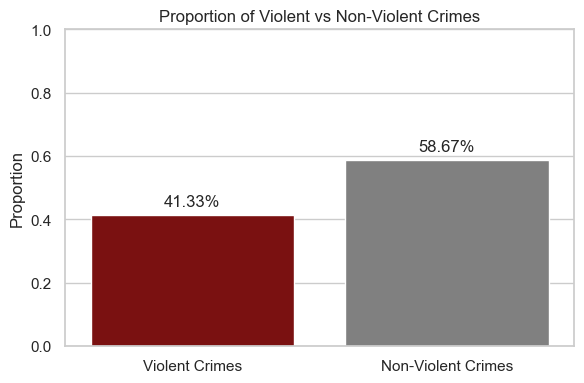

In [155]:
# 4. 비율 계산
violent_ratio = df['IsDangerous'].mean()

# 5. 시각화
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x=['Violent Crimes', 'Non-Violent Crimes'], 
            y=[violent_ratio, 1 - violent_ratio], 
            palette=['darkred', 'gray'])

# 비율 텍스트 추가 (% 단위로 표시)
for i, v in enumerate([violent_ratio, 1 - violent_ratio]):
    plt.text(i, v + 0.02, f"{v * 100:.2f}%", ha='center', va='bottom', fontsize=12)

plt.title('Proportion of Violent vs Non-Violent Crimes')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [157]:
print("전체 범죄 수:", len(df))
print("1급 범죄 수 (is_index_crime):", df['IsDangerous'].sum())
print("폭력 범죄 수 (is_violent_crime):", df['IsViolent'].sum())
print("1급 범죄 비율:", df['IsDangerous'].mean() * 100, "%")
print("폭력 범죄 비율:", df['IsViolent'].mean() * 100, "%")


전체 범죄 수: 8276672
1급 범죄 수 (is_index_crime): 3420826
폭력 범죄 수 (is_violent_crime): 707208
1급 범죄 비율: 41.33093591240537 %
폭력 범죄 비율: 8.544593769089797 %


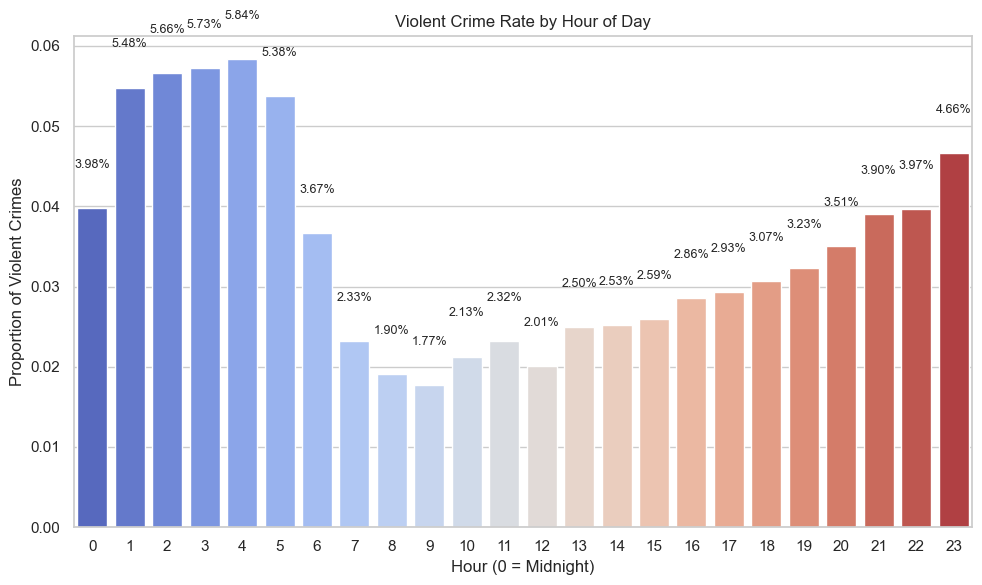

In [71]:
# Time 컬럼이 문자열이면 datetime으로 변환 (오류 안 나게 try)
df['Time'] = pd.to_datetime(df['Time'], format="%H:%M:%S").dt.time
# 시간대(Hour) 추출
df['Hour'] = pd.to_datetime(df['Time'], format="%H:%M:%S").dt.hour

# 시간대별 강력범죄 비율 계산
violent_by_hour = df.groupby('Hour')['IsDangerous'].mean().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=violent_by_hour.index, 
            y=violent_by_hour.values, 
            palette='coolwarm')

plt.title('Violent Crime Rate by Hour of Day')
plt.xlabel('Hour (0 = Midnight)')
plt.ylabel('Proportion of Violent Crimes')

# 비율 텍스트 표시
for i, v in enumerate(violent_by_hour.values):
    plt.text(i, v + 0.005, f"{v * 100:.2f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

                                     count     sum  Dangerous Proportion
Primary Type                                                            
THEFT                              1754086       0              0.000000
BATTERY                            1508471  229114             15.188492
CRIMINAL DAMAGE                     941565       0              0.000000
NARCOTICS                           759310       0              0.000000
ASSAULT                             550943  151486             27.495766
OTHER OFFENSE                       515365       0              0.000000
BURGLARY                            439508       0              0.000000
MOTOR VEHICLE THEFT                 420504       0              0.000000
DECEPTIVE PRACTICE                  378057       0              0.000000
ROBBERY                             310911  310911            100.000000
CRIMINAL TRESPASS                   223499       0              0.000000
WEAPONS VIOLATION                   121488       0 

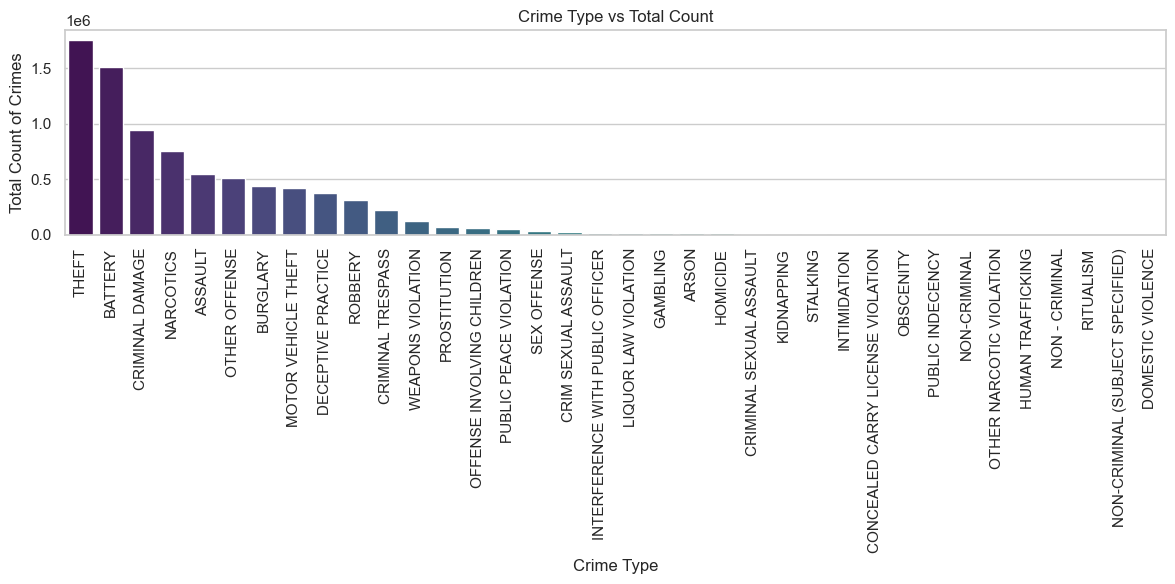

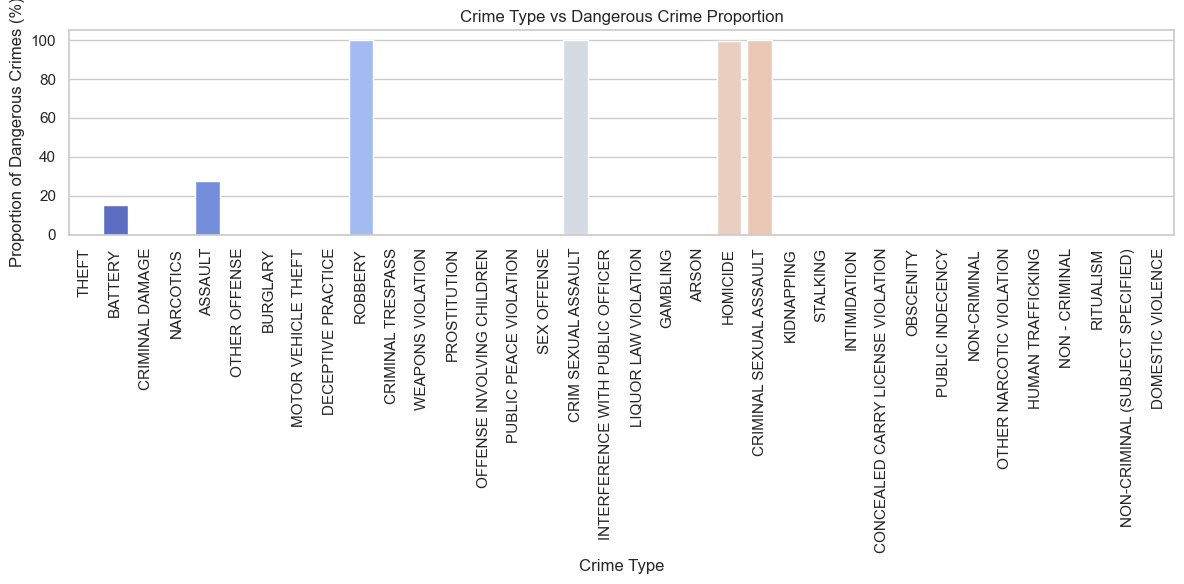

In [158]:

crime_counts = df.groupby('Primary Type')['IsViolentIndex'].agg(['count', 'sum'])

# 위험한 사건 비율 계산
crime_counts['Dangerous Proportion'] = crime_counts['sum'] / crime_counts['count'] * 100

# 결과 확인
crime_counts = crime_counts.sort_values(by='count', ascending=False)  # 사건 수 기준으로 정렬
print(crime_counts)

# 시각화: 범죄 유형별 사건 수
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_counts.index, y=crime_counts['count'], palette='viridis')
plt.title('Crime Type vs Total Count')
plt.xlabel('Crime Type')
plt.ylabel('Total Count of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 시각화: 범죄 유형별 위험한 사건 비율
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_counts.index, y=crime_counts['Dangerous Proportion'], palette='coolwarm')
plt.title('Crime Type vs Dangerous Crime Proportion')
plt.xlabel('Crime Type')
plt.ylabel('Proportion of Dangerous Crimes (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [104]:
# 1. IUCR 코드 문자열 정리
df['IUCR'] = df['IUCR'].astype(str).str.strip().str.upper()
iucr_df['IUCR'] = iucr_df['IUCR'].astype(str).str.zfill(4).str.upper()

# 2. merge 수행 (IUCR 기준으로 INDEX CODE 붙이기)
df = df.merge(iucr_df[['IUCR', 'INDEX CODE']], on='IUCR', how='left')

# 3. 위험 범죄 여부 컬럼 생성
df['IsDangerous'] = (df['INDEX CODE'] == 'I').astype(int)


In [103]:
iucr_df=pd.read_csv('Chicago_Police_Department_-_Illinois_Uniform_Crime_Reporting__IUCR__Codes_20250327.csv', encoding='utf-8')

In [99]:
df['IsDangerous'] = (df['INDEX CODE'] == 'I').astype(int)

In [105]:
df[df['INDEX CODE'].isna()].shape

(6439, 28)

In [106]:
df[df['Primary Type'] == 'HOMICIDE']['IUCR'].value_counts()

IUCR
0110    12993
0142       77
0141        6
0130        1
Name: count, dtype: int64

In [107]:
unmatched_codes = df[df['INDEX CODE'].isna()]['IUCR'].value_counts()
print(unmatched_codes)


IUCR
0710    3270
1581    1592
0760    1032
1187     112
5093     111
5114      76
2896      72
1192      58
1518      14
1573      11
3961      11
1101      10
5073       9
0585       8
1726       7
1263       6
1102       5
1519       5
1599       5
1262       4
1504       4
5094       4
1199       3
5113       3
1197       2
1147       2
1577       2
9901       1
Name: count, dtype: int64


In [87]:
iucr_df[iucr_df['IUCR'].isin(['0710', '1581', '0760'])]

,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,INDEX CODE,ACTIVE


In [93]:
# 1. 누락된 IUCR 코드 리스트
target_iucrs = [
    '0710', '1581', '0760', '1187', '5093', '5114', '2896', '1192', '1518', '1573',
    '3961', '1101', '5073', '0585', '1726', '1263', '1102', '1519', '1599', '1262',
    '1504', '5094', '1199', '5113', '1197', '1147', '1577', '9901'
]

# 2. 해당 IUCR 코드가 포함된 행 필터링 후, Primary Type + Description별로 건수 집계
unmatched_summary = (
    df[df['IUCR'].isin(target_iucrs)]
    .groupby(['IUCR', 'Primary Type', 'Description'])
    .size()
    .reset_index(name='건수')
    .sort_values(by='건수', ascending=False)
)

# 3. 결과 출력
print(unmatched_summary)


    IUCR                      Primary Type  \
1   0710                             THEFT   
17  1581                       SEX OFFENSE   
2   0760                          BURGLARY   
18  1581                       SEX OFFENSE   
6   1187                DECEPTIVE PRACTICE   
24  5093                      NON-CRIMINAL   
21  2896            PUBLIC PEACE VIOLATION   
7   1192                DECEPTIVE PRACTICE   
28  5114                      NON-CRIMINAL   
27  5114                    NON - CRIMINAL   
13  1518                         OBSCENITY   
15  1573                       SEX OFFENSE   
22  3961                      INTIMIDATION   
3   1101                DECEPTIVE PRACTICE   
23  5073  NON-CRIMINAL (SUBJECT SPECIFIED)   
0   0585                      NON-CRIMINAL   
20  1726        OFFENSE INVOLVING CHILDREN   
11  1263                DECEPTIVE PRACTICE   
14  1519        OFFENSE INVOLVING CHILDREN   
19  1599                       SEX OFFENSE   
4   1102                DECEPTIVE 

In [112]:
# 폭력성 있는 1급 범죄 IUCR 코드만 필터링
violent_index_iucr = iucr_df[
    (iucr_df['INDEX CODE'] == 'I') &
    (iucr_df['PRIMARY DESCRIPTION'].str.contains('ASSAULT|BATTERY|ROBBERY|HOMICIDE|CRIM SEXUAL|KIDNAPPING|SEX', case=False, na=False))
]['IUCR'].tolist()

# 적용해서 IsViolentIndex 컬럼 생성
df['IsViolentIndex'] = df['IUCR'].isin(violent_index_iucr).astype(int)

# 비율 확인
df['IsViolentIndex'].value_counts(normalize=True) * 100


IsViolentIndex
0    91.033244
1     8.966756
Name: proportion, dtype: float64

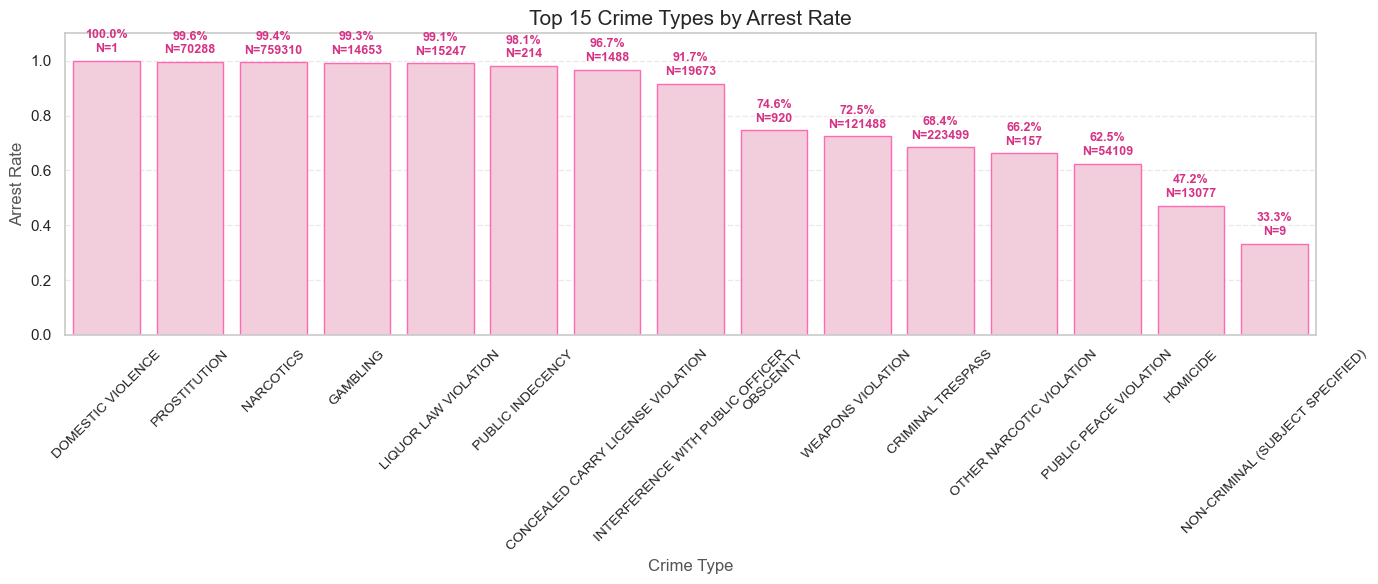

,mean,count
Primary Type,,
DOMESTIC VIOLENCE,1.000000,1
PROSTITUTION,0.995746,70288
NARCOTICS,0.993748,759310
GAMBLING,0.992766,14653
LIQUOR LAW VIOLATION,0.990621,15247
PUBLIC INDECENCY,0.981308,214
CONCEALED CARRY LICENSE VIOLATION,0.967070,1488
INTERFERENCE WITH PUBLIC OFFICER,0.916840,19673
OBSCENITY,0.745652,920


In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 범죄 유형별 체포율 및 건수 계산
arrest_grouped = df.groupby('Primary Type')['Arrest'].agg(['mean', 'count'])
arrest_grouped = arrest_grouped.sort_values(by='mean', ascending=False).head(15)

# 핑크 테마 설정
plt.rcParams['font.family'] = 'Arial'  # 시스템 한글 폰트 안 될 경우 영어 폰트 사용

bar_color = '#F8C8DC'     # 연핑크
text_color = '#D63384'    # 딥핑크 텍스트
edge_color = '#FF69B4'    # 진한 핑크 테두리

# 시각화
plt.figure(figsize=(14, 6))
sns.set(style='whitegrid')
bars = sns.barplot(
    x=arrest_grouped.index,
    y=arrest_grouped['mean'],
    color=bar_color,
    edgecolor=edge_color
)

# 막대 위에 체포율 + 사례 수 표기
for index, row in arrest_grouped.iterrows():
    plt.text(x=arrest_grouped.index.get_loc(index),
             y=row['mean'] + 0.02,
             s=f"{row['mean']*100:.1f}%\nN={int(row['count'])}",
             ha='center', va='bottom', fontsize=9, color=text_color, fontweight='bold')

# 제목 및 라벨
plt.title('Top 15 Crime Types by Arrest Rate', fontsize=15)
plt.xlabel('Crime Type', fontsize=12, color='#555555')
plt.ylabel('Arrest Rate', fontsize=12, color='#555555')
plt.xticks(rotation=45, fontsize=10)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 데이터 출력 (표 형식)
arrest_grouped.head(15)


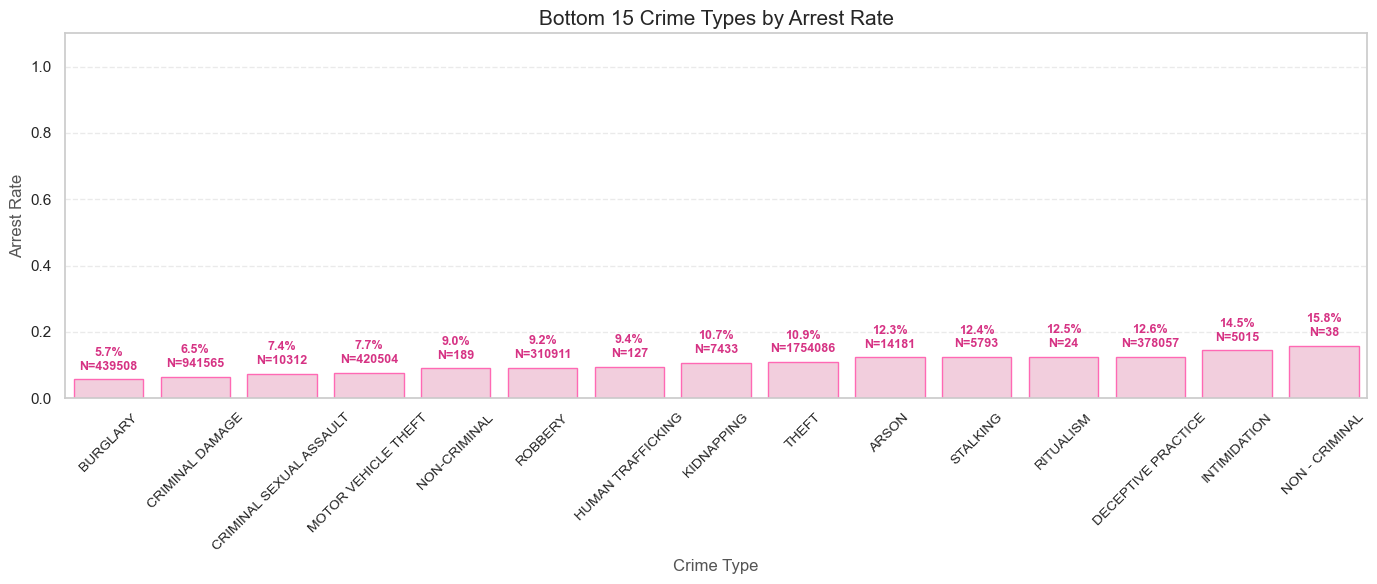

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a clean English-friendly font
plt.rcParams['font.family'] = 'Arial'  # You can also try 'DejaVu Sans'

# Color theme
bar_color = '#F8C8DC'      # Light pink
text_color = '#D63384'     # Deep pink for text
edge_color = '#FF69B4'     # Pink outline

# Plot
plt.figure(figsize=(14, 6))
sns.set(style='whitegrid')
bars = sns.barplot(
    x=arrest_grouped_tail.index,
    y=arrest_grouped_tail['mean'],
    color=bar_color,
    edgecolor=edge_color
)

# Annotate bars with arrest rate + count
for index, row in arrest_grouped_tail.iterrows():
    plt.text(x=arrest_grouped_tail.index.get_loc(index),
             y=row['mean'] + 0.02,
             s=f"{row['mean']*100:.1f}%\nN={int(row['count'])}",
             ha='center', va='bottom', fontsize=9, color=text_color, fontweight='bold')

# Title and labels (English only)
plt.title('Bottom 15 Crime Types by Arrest Rate', fontsize=15)
plt.xlabel('Crime Type', fontsize=12, color='#555555')
plt.ylabel('Arrest Rate', fontsize=12, color='#555555')
plt.xticks(rotation=45, fontsize=10)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [156]:
# 1. 폭력 범죄 기준 함수 (IsViolent)
def is_violent_crime(row):
    primary = row['Primary Type']
    description = str(row['Description']).upper()

    if primary in ['HOMICIDE', 'CRIMINAL SEXUAL ASSAULT', 'ROBBERY']:
        return True
    elif primary in ['ASSAULT', 'BATTERY'] and 'AGGRAVATED' in description:
        return True
    else:
        return False

# 2. IsViolent 컬럼 생성
df['IsViolent'] = df.apply(is_violent_crime, axis=1)

# 3. 주요 재산/무기 범죄 목록
serious_property_crimes = ['BURGLARY', 'MOTOR VEHICLE THEFT', 'ARSON', 'WEAPONS VIOLATION']

# 4. IsDangerous 정의
df['IsDangerous'] = (
    df['IsViolent'] |
    df['Primary Type'].isin(serious_property_crimes) |
    ((df['Domestic'] == True) & (~df['Arrest'])) |
    ((df['Primary Type'].isin(['ASSAULT', 'BATTERY', 'CRIMINAL SEXUAL ASSAULT'])) & (~df['Arrest']))
).astype(int)


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8276672 entries, 0 to 8276671
Data columns (total 32 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
 22  geometry              object 
 23  Communi

In [165]:
from scipy.stats import f_oneway

# Beat별로 체포 결과 리스트 생성 (True=1, False=0 이진값)
grouped_arrests = df.groupby('Beat')['Arrest'].apply(list)

# 관측치가 충분한(예: 30개 이상) Beat만 선택
filtered_groups = [arrests for arrests in grouped_arrests if len(arrests) >= 30]

# ANOVA 수행
f_stat, p_val = f_oneway(*filtered_groups)

print(f'ANOVA 결과:')
print(f'F-통계량: {f_stat:.4f}')
print(f'p-value: {p_val:.4f}')

if p_val < 0.05:
    print("→ 유의미한 차이 있음: Beat에 따라 체포율이 다릅니다.")
else:
    print("→ 유의미한 차이 없음: Beat에 따라 체포율이 통계적으로 유의하게 다르지 않습니다.")


ANOVA 결과:
F-통계량: 1037.1763
p-value: 0.0000
→ 유의미한 차이 있음: Beat에 따라 체포율이 다릅니다.


In [168]:
import pandas as pd

# Arrest 컬럼이 True/False이면 1/0으로 변환
df['Arrest'] = df['Arrest'].astype(int)

# 통계 요약
desc_stats = df.groupby('Beat')['Arrest'].agg(
    mean='mean',
    std='std',
    n='count'
).reset_index()

# 출력
print(desc_stats.head(10))  # 상위 10개만 확인


   Beat      mean       std      n
0   111  0.250138  0.433098  36184
1   112  0.184395  0.387812  31465
2   113  0.218272  0.413082  24726
3   114  0.137106  0.343972  13413
4   121  0.148634  0.355746   9520
5   122  0.287771  0.452729  43750
6   123  0.257908  0.437489  37273
7   124  0.237381  0.425487  23140
8   131  0.268397  0.443132  31215
9   132  0.270407  0.444176  36874


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# OLS 모델 적합
model = ols('Arrest ~ C(Beat)', data=df).fit()

# ANOVA 표
anova_table = sm.stats.anova_lm(model, typ=2)

# Eta squared (효과크기) 추가
anova_table['eta_sq'] = anova_table['sum_sq'] / anova_table['sum_sq'].sum()

print(anova_table)


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['Arrest'], groups=df['Beat'], alpha=0.05)
print(tukey.summary())


In [ ]:
from scipy.stats import shapiro, levene

# 정규성 검정 (샘플로 상위 Beat 5개)
top_beats = df['Beat'].value_counts().index[:5]
for beat in top_beats:
    sample = df[df['Beat'] == beat]['Arrest']
    stat, p = shapiro(sample)
    print(f'Beat {beat} 정규성 p-value: {p:.4f}')

# 등분산성 검정 (상위 5개 Beat 간 비교)
grouped = [df[df['Beat'] == b]['Arrest'] for b in top_beats]
stat, p = levene(*grouped)
print(f'Levene 등분산성 검정 p-value: {p:.4f}')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 박스플롯 (상위 10개 Beat)
top_beats = df['Beat'].value_counts().index[:10]
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Beat'].isin(top_beats)], x='Beat', y='Arrest')
plt.title('상위 10개 Beat의 체포율 분포 (Boxplot)')
plt.show()

# 에러바 플롯 (평균 ± 표준오차)
summary = df[df['Beat'].isin(top_beats)].groupby('Beat')['Arrest'].agg(['mean', 'sem']).reset_index()
plt.figure(figsize=(12,6))
plt.errorbar(summary['Beat'], summary['mean'], yerr=summary['sem'], fmt='o', capsize=5)
plt.title('상위 10개 Beat 평균 체포율 ± 표준오차')
plt.xlabel('Beat')
plt.ylabel('평균 체포율')
plt.show()
